<a href="https://colab.research.google.com/github/arnold8968/Coursera_Capstone/blob/main/The_Battle_of_Neighborhoods_(Week_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project – The Battle of Neighborhoods | What is the best location assessment for new medical center in USA

## Workflow stages
### Step by step solution

1.	**Business Understanding** This stage is the most important because this is where the intention of the project is outlined. Foundational Methodology and CRISP-DM are aligned here. It requires communication and clarity. The difficulty here is that stakeholders have different objectives, biases, and modalities of relating information. They don’t all see the same things or in the same manner. Without clear, concise, and complete perspective of what the project goals are resources will be needlessly expended.
2.	**Data Understanding** Data understanding relies on business understanding. Data is collected at this stage of the process. The understanding of what the business wants and needs will determine what data is collected, from what sources, and by what methods. CRISP-DM combines the stages of Data Requirements, Data Collection, and Data Understanding from the Foundational Methodology outline.
3.	**Data Preparation** Once the data has been collected, it must be transformed into a useable subset unless it is determined that more data is needed. Once a dataset is chosen, it must then be checked for questionable, missing, or ambiguous cases. Data Preparation is common to CRISP-DM and Foundational Methodology.
4.	**Modeling** Once prepared for use, the data must be expressed through whatever appropriate models, give meaningful insights, and hopefully new knowledge. This is the purpose of data mining: to create knowledge information that has meaning and utility. The use of models reveals patterns and structures within the data that provide insight into the features of interest. Models are selected on a portion of the data and adjustments are made if necessary. Model selection is an art and science. Both Foundational Methodology and CRISP-DM are required for the subsequent stage.
5.	**Evaluation** The selected model must be tested. This is usually done by having a pre-selected test, set to run the trained model on. This will allow you to see the effectiveness of the model on a set it sees as new. Results from this are used to determine efficacy of the model and foreshadows its role in the next and final stage.
6.	**Deployment** In the deployment step, the model is used on new data outside of the scope of the dataset and by new stakeholders. The new interactions at this phase might reveal the new variables and needs for the dataset and model. These new challenges could initiate revision of either business needs and actions, or the model and data, or both.

Since we have discussed Business Understanding and Data Understanding in previous work, now we will begin with the Data Preparation part

## Data Preparation

### 1. Web scraping

1.1 Inspect the webpage

Take the competitor for example


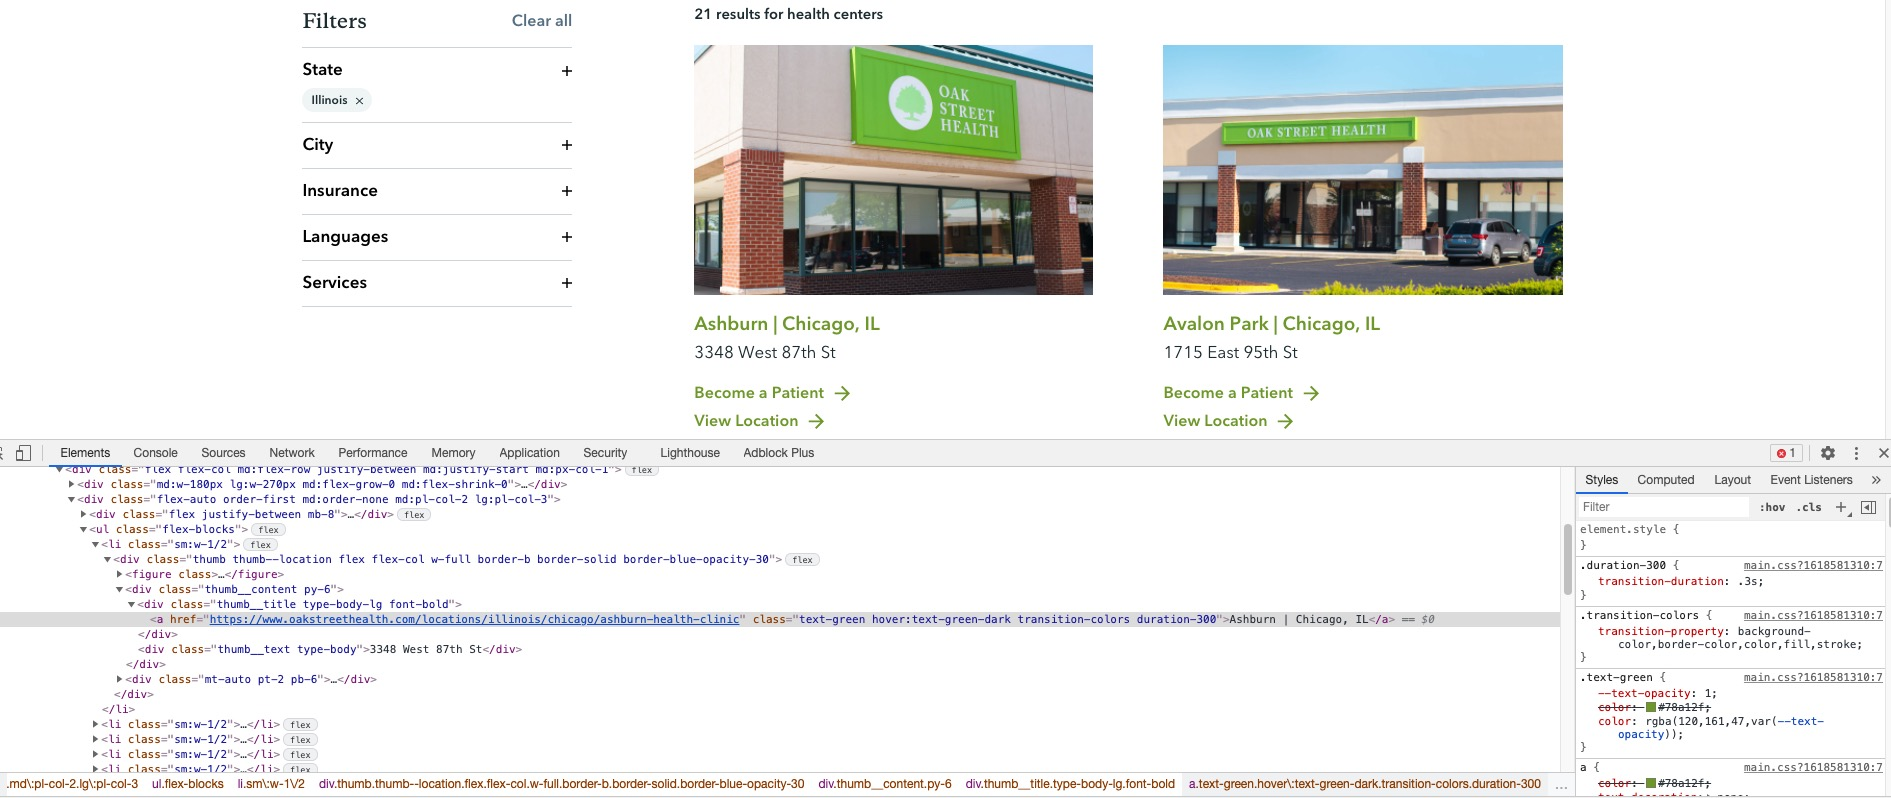

1.2. Parse the webpage html using Beautiful Soup

In [ ]:
# import libraries
import urllib
import requests
from bs4 import BeautifulSoup
import csv

define the url that you are scraping. We then make the connection to the webpage and we can parse the html using BeautifulSoup, storing the object in the variable ‘soup’.
 

In [ ]:
url = 'https://www.oakstreethealth.com/locations/illinois'

user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(url, headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')

print(soup)


<!DOCTYPE html>

<html class="no-js" lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
<head>
<script>dataLayer = []</script>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://215638-654214-raikfcquaxqncofqfm.stackpathdns.com" rel="preconnect"/>
<link href="https://215638-654214-raikfcquaxqncofqfm.stackpathdns.com/dist/styles/main.css?1618581310" rel="stylesheet"/>
<link href="https://215638-654214-raikfcquaxqncofqfm.stackpathdns.com/dist/static/apple-touch-icon.png?1615935729" rel="apple-touch-icon" sizes="180x180"/>
<link href="https://215638-654214-raikfcquaxqncofqfm.stackpathdns.com/dist/static/favicon-32x32.png?1615935729" rel="icon" sizes="32x32" type="image/png"/>
<link href="https://215638-654214-raikfcquaxqncofqfm.stackpathdns.com/dist/static/favicon-16x16.png?1615935729" rel="icon" sizes="16x16" type="image/png"/>
<link href="https://215638-654214-raikfcqua

Search for html elements

In [ ]:
for review in soup.find_all('div', class_='thumb__content'): 
  #print(review)
  name = review.find('div', class_='thumb__title').text.replace('\n', '')
  oaklocation = review.find('div', class_='thumb__text type-body').text
  print(name)
  print(oaklocation)

Ashburn | Chicago, IL
3348 West 87th St
Avalon Park | Chicago, IL
1715 East 95th St
Bellwood | Bellwood, IL
456 25th Ave
Berwyn | Berwyn, IL
7000 Cermak Rd
Blue Island | Blue Island, IL
3046 West 127th St
Brighton Park | Chicago, IL
4327 South Archer Ave
Bronzeville | Chicago, IL
4318 South State St
Chicago Ave | Oak Park, IL
18 Chicago Ave
Edgewater | Chicago, IL
1541 West Devon Ave
Elgin | Elgin, IL
822 Summit St
Englewood | Chicago, IL
850 West 63rd St
Hermosa | Chicago, IL
4417 West Diversey Ave
Joliet | Joliet, IL
2025 South Chicago St
Joliet West | Joliet, IL
2202 Essington Rd
Lincoln Crossing | Chicago Heights, IL
1401 Western Ave
Little Village | Chicago, IL
3010 West 26th St
Madison St | Chicago, IL
3433 West Madison St
Portage Park | Chicago, IL
4848 West Irving Park Rd
Rockford | Rockford, IL
301 East State St
Waukegan | Waukegan, IL
3210 Grand Ave
Wilmington | Wilmington, IL
121 Robert P Weidling Dr


In [ ]:


location_list = ['Illinois', 'Indiana', 'Michigan', 'North-Carolina', 'Ohio', 'Pennsylvania', 'Rhode-Island', 'Tennessee', 'Texas', 'New-York', 'Mississippi' ]



review_dict = {'name':[], 'location':[]}

with open('oakstreet.csv', 'a', newline='') as w:
    w = csv.writer(w)
    #w.writerow(["name", "location"])
    for location in location_list:
        url = 'https://www.oakstreethealth.com/locations/'+(location.lower())
    
        user_agent = {'User-agent': 'Mozilla/5.0'}
        response = requests.get(url, headers = user_agent)
    
        soup = BeautifulSoup(response.text, 'html.parser')
        for review in soup.find_all('div', class_='thumb__content'): 
            #print(review)
            name = review.find('div', class_='thumb__title').text.replace('\n', '')
            oaklocation = review.find('div', class_='thumb__text type-body').text
            review_dict['name'].append(review.find('div', class_='thumb__title').text.replace('\n', ''))
            review_dict['location'].append(review.find('div', class_='thumb__text type-body').text)
            w.writerow([name, oaklocation])


In [ ]:
import pandas as pd
df_oak = pd.read_csv('./oakstreet.csv')
df_oak.columns=['name', 'address']
df_oak.head()
#df_oak.info()

,name,address
0,"Avalon Park | Chicago, IL",1715 East 95th St
1,"Bellwood | Bellwood, IL",456 25th Ave
2,"Berwyn | Berwyn, IL",7000 Cermak Rd
3,"Blue Island | Blue Island, IL",3046 West 127th St
4,"Brighton Park | Chicago, IL",4327 South Archer Ave


1.3. transfer the address into latitude and longitude

geopy is a Python client for several popular geocoding web services.

geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

In [ ]:
import geopy
import pandas as pd
import numpy as np
import time

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="location")

location = geolocator.geocode("175 5th Avenue NYC")

print("The latitude and longitude of 175 5th Avenue NYC is: ", location.latitude, location.longitude)

df_oak['Lat']= 0.0
df_oak['Long'] = 0.0

for i in range(0, 10):
    lat_long = geolocator.geocode(df_oak.address[i])
    df_oak['Lat'][i]  = lat_long.latitude
    df_oak['Long'][i] = lat_long.longitude
    time.sleep(1.5)
    

The latitude and longitude of 175 5th Avenue NYC is:  40.741059199999995 -73.98964162240998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_oak.drop(['Lat_Long'], axis=1, inplace=True)
df_oak.head()

,name,address,Lat,Long
0,"Avalon Park | Chicago, IL",1715 East 95th St,41.720432,-87.581784
1,"Bellwood | Bellwood, IL",456 25th Ave,-25.718111,28.229053
2,"Berwyn | Berwyn, IL",7000 Cermak Rd,42.174982,-88.280166
3,"Blue Island | Blue Island, IL",3046 West 127th St,38.898233,-94.870388
4,"Brighton Park | Chicago, IL",4327 South Archer Ave,41.814850,-87.702426


2. Data Cleaning

From table, we can see the location doesn't contain the City and State. We can split the 'name' column to get the state and city

In [ ]:
df_oak['state'] = df_oak['name'].apply(lambda x: x.split(',')[-1])
df_oak['city'] = df_oak['name'].apply(lambda x: x.split('|')[-1].split(',')[0])

In [ ]:
df_oak.head()

,name,address,Lat,Long,state,city
0,"Avalon Park | Chicago, IL",1715 East 95th St,41.720432,-87.581784,IL,Chicago
1,"Bellwood | Bellwood, IL",456 25th Ave,-25.718111,28.229053,IL,Bellwood
2,"Berwyn | Berwyn, IL",7000 Cermak Rd,42.174982,-88.280166,IL,Berwyn
3,"Blue Island | Blue Island, IL",3046 West 127th St,38.898233,-94.870388,IL,Blue Island
4,"Brighton Park | Chicago, IL",4327 South Archer Ave,41.814850,-87.702426,IL,Chicago


3. Data visualization


In [ ]:
import plotly.graph_objects as go

mapbox_access_token = 'pk.eyJ1Ijoid3lhbjE2IiwiYSI6ImNraTF3ZWU3YzFlMzYycG9kZTcwNzV5YjcifQ.NfzL9PX_4lSBfFDPbgZwjw'

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
        lat=df_oak.Lat,
        lon=df_oak.Long,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=6,
            color='red',
            opacity=0.8
        ),
        text='ChenMed Office' + df_oak.name,
        hoverinfo='text',
        name='ChenMed Health Center'
    ))

# fig.add_trace(go.Scattermapbox(
#         lat=oak.lat,
#         lon=oak.long,
#         mode='markers',
#         marker=go.scattermapbox.Marker(
#             size=6,
#             color='green',
#             opacity=0.6
#         ),
#         text='OakStreet Office'+ oak.Lat_Long + oak.name,
#         hoverinfo='text',
#         name='Oak Street Healthe Center'
#     ))

# fig.add_trace(go.Scattermapbox(
#         lat=conviva.lat,
#         lon=conviva.long,
#         mode='markers',
#         marker=go.scattermapbox.Marker(
#             size=6,
#             color='blue',
#             opacity=0.6
#         ),
#         text='conviva Office' + conviva.Lat_Long + conviva.name,
#         hoverinfo='text',
#         name='Conviva Care Center'
#     ))

fig.update_layout(
    title='Health Center Location',
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig.show()

4. Writing to an output file

In [ ]:
df_oak.to_csv('./oakstreet_latlong.csv')

Right now, we have 

1.   connected the webpage of what we need
2.   parsed html page using BeautifulSoup
3.   Looping through the soup object to find elements
4.   Performing some simple data cleaning.
5.   Writing data to csv

We can use a similar way to acquire data for the competitor

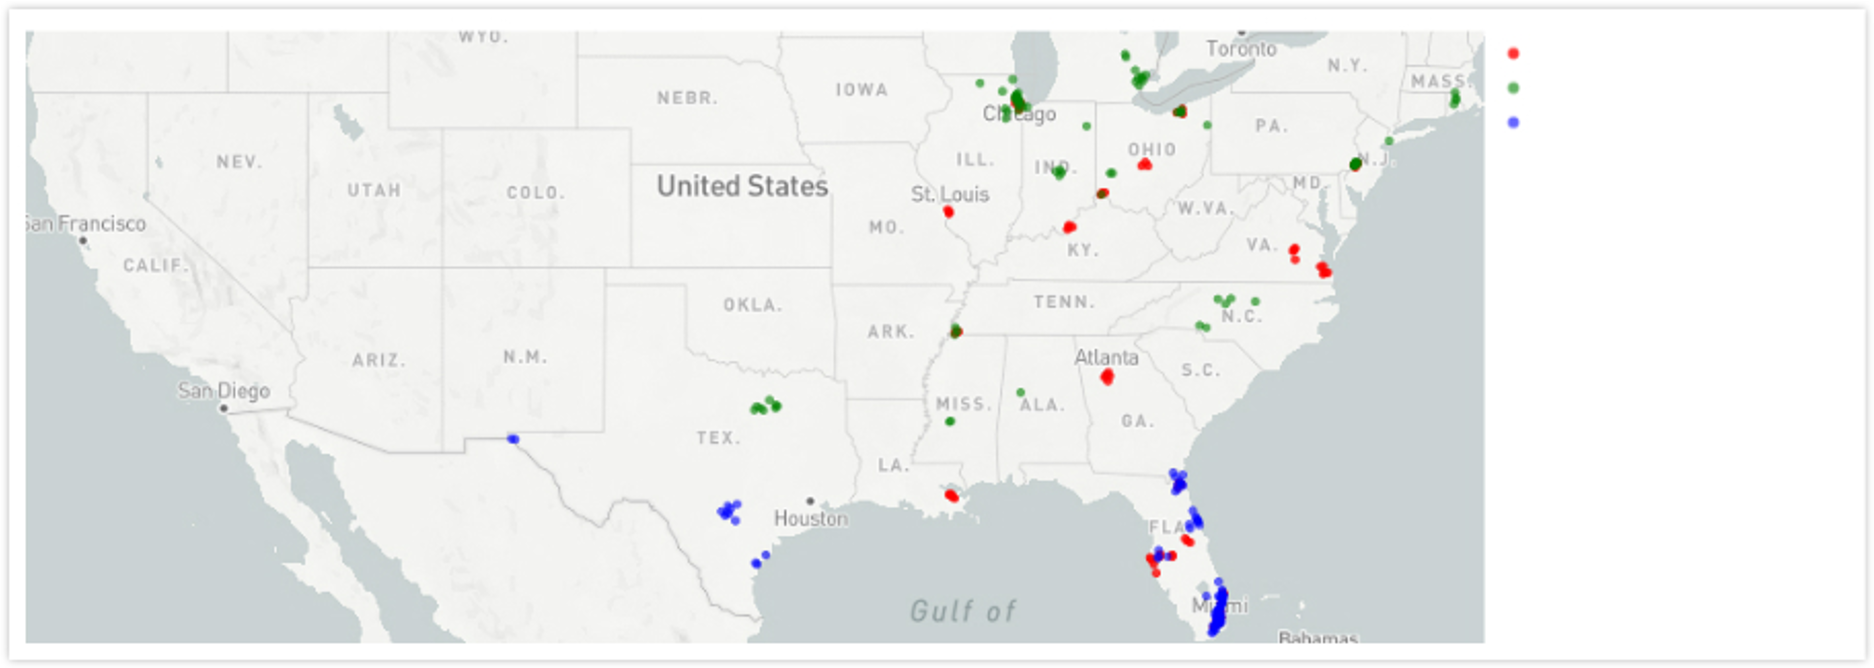

# 2. Modeling


We have acquire and clean the XXX healcare center. Now, we will use the Foursquare API to gather information on venues. 

Import Required Libraries and setup FourSquare Veriables

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 81kB 3.3MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76240 sha256=bd8b90e657b94551f7a88e38361099587969f45546f06e70ccc0cbc4d6fb68a4
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Folium installed
Libraries imported.


# 2.1 Foursquare API
The Places API offers real-time access to Foursquare’s global database of rich venue data and user content to power your location-based experiences in your app or website.

In [2]:
CLIENT_ID = 'DPDV0KUL5LXO2YWQEZM3BG143VN2ACJMYZ4MQVGE54L4445D'# Foursquare Id
CLIENT_SECRET = '5S4FL1IGA2WPOYW0BPDHY0QKVQX5HVAS05AKSH5MFS5OCRTS' # Foursquare Secret
VERSION = '20180605' # API version

In [20]:
# Load the data

df = pd.read_csv('./chen_fips.csv')
df['Latitude'] = df['Lat_Long'].apply(lambda x: x.replace('(', '').split(',')[0]).astype(float)
df['Longitude'] = df['Lat_Long'].apply(lambda x: x.replace(')', '').split(',')[-1]).astype(float)

#df.info()
neighborhood_latitude = df['Latitude'][0]
neighborhood_longitude = df['Longitude'][0]
df.head()

In [31]:
df.head()

,Unnamed: 0,office_name,ADDRESS1,ADDRESS2,CITY,STATE,ZIP,Lat_Long,city,state_id,county_fips,county_name,Latitude,Longitude
0,0,Miami Gardens,1000 Park Centre Blvd,Suite 100,Miami Gardens,FL,33169,"(25.9288891, -80.2192368)",Miami Gardens,FL,12086.0,Miami-Dade,25.928889,-80.219237
1,1,Miami Lakes,5961 NW 173rd Dr,NaN,Hialeah,FL,33015,"(25.931108950000002, -80.29985115)",Hialeah,FL,12086.0,Miami-Dade,25.931109,-80.299851
2,2,North Miami Beach,1431 NE 162nd St,NaN,North Miami Beach,FL,33162,"(25.9249561, -80.17102061471147)",North Miami Beach,FL,12086.0,Miami-Dade,25.924956,-80.171021
3,3,Hallandale,410 E Hallandale Beach Blvd,NaN,Hallandale,FL,33009,"(25.985813, -80.14394509090909)",Hallandale,FL,12086.0,Miami-Dade,25.985813,-80.143945
4,4,125th Street,1190 NE 125th St,NaN,North Miami,FL,33161,"(25.890532200000003, -80.17461435089542)",North Miami,FL,12086.0,Miami-Dade,25.890532,-80.174614


In [23]:
radius = 500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
   LIMIT)
url
results = requests.get(url).json()

In [24]:
results

{'meta': {'code': 200, 'requestId': '607b458808ffa619cd50fe94'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4d1127485f3376ebab631386-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_shoestore_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d107951735',
         'name': 'Shoe Store',
         'pluralName': 'Shoe Stores',
         'primary': True,
         'shortName': 'Shoes'}],
       'id': '4d1127485f3376ebab631386',
       'location': {'address': '805 N.W. 167th Street',
        'cc': 'US',
        'city': 'Miami',
        'country': 'United States',
        'distance': 415,
        'formattedAddress': ['805 N.W. 167th Street',
         'Miami, FL 33169',
         'United States'],
        'labeledLatLngs': [{'label': 'display',
        

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,e-0-4d1127485f3376ebab631386-0,0,"[{'summary': 'This spot is popular', 'type': '...",4d1127485f3376ebab631386,SKECHERS Warehouse Outlet,805 N.W. 167th Street,25.928120,-80.215172,"[{'label': 'display', 'lat': 25.92811965942382...",415,33169,US,Miami,FL,United States,"[805 N.W. 167th Street, Miami, FL 33169, Unite...","[{'id': '4bf58dd8d48988d107951735', 'name': 'S...",0,[],NaN
1,e-0-4b477653f964a520d53226e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b477653f964a520d53226e3,Subway Sandwiches & Salads,1000 Park Centre Blvd Ste 110,25.928760,-80.219294,"[{'label': 'display', 'lat': 25.92875981711561...",15,33169,US,Miami,FL,United States,"[1000 Park Centre Blvd Ste 110, Miami, FL 3316...","[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",0,[],NaN
2,e-0-4b106654f964a5209f6f23e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b106654f964a5209f6f23e3,Peter Glenn Ski & Sports,900 Park Centre Boulevard,25.928078,-80.218787,"[{'label': 'display', 'lat': 25.92807781, 'lng...",100,33169,US,Miami Gardens,FL,United States,"[900 Park Centre Boulevard, Miami Gardens, FL ...","[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",0,[],550201593
3,e-0-5557764b498eb195c180963f-3,0,"[{'summary': 'This spot is popular', 'type': '...",5557764b498eb195c180963f,F355MIAMI,16560 NW 10th Ave,25.926665,-80.216584,"[{'label': 'display', 'lat': 25.92666463536990...",363,33169,US,Miami,FL,United States,"[16560 NW 10th Ave, Miami, FL 33169, United St...","[{'id': '52f2ab2ebcbc57f1066b8b44', 'name': 'A...",0,[],NaN


In [27]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,SKECHERS Warehouse Outlet,Shoe Store,25.928120,-80.215172
1,Subway Sandwiches & Salads,Sandwich Place,25.928760,-80.219294
2,Peter Glenn Ski & Sports,Athletics & Sports,25.928078,-80.218787
3,F355MIAMI,Auto Garage,25.926665,-80.216584


In [28]:
nearby_venues['categories'].unique()

array(['Shoe Store', 'Sandwich Place', 'Athletics & Sports',
       'Auto Garage'], dtype=object)

In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


# 2.2 Get the nearby venues



In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
venues = getNearbyVenues(names=df['office_name'],latitudes=df['Latitude'],longitudes=df['Longitude'])

In [38]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            1238 non-null   object 
 1   Neighborhood Latitude   1238 non-null   float64
 2   Neighborhood Longitude  1238 non-null   float64
 3   Venue                   1238 non-null   object 
 4   Venue Latitude          1238 non-null   float64
 5   Venue Longitude         1238 non-null   float64
 6   Venue Category          1238 non-null   object 
dtypes: float64(4), object(3)
memory usage: 67.8+ KB


In [39]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Miami Gardens,25.928889,-80.219237,SKECHERS Warehouse Outlet,25.928120,-80.215172,Shoe Store
1,Miami Gardens,25.928889,-80.219237,Subway Sandwiches & Salads,25.928760,-80.219294,Sandwich Place
2,Miami Gardens,25.928889,-80.219237,Peter Glenn Ski & Sports,25.928078,-80.218787,Athletics & Sports
3,Miami Gardens,25.928889,-80.219237,F355MIAMI,25.926665,-80.216584,Auto Garage
4,Miami Lakes,25.931109,-80.299851,BJ's Wholesale Club,25.929263,-80.295686,Warehouse Store


In [43]:
venues['Venue'].value_counts().head(10)

Walgreens         22
Family Dollar     21
Subway            16
McDonald's        13
SUBWAY            12
Dollar Tree       11
Shell             11
Dollar General    10
Redbox            10
GameStop          10
Name: Venue, dtype: int64

In [44]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
125th Street,5,5,5,5,5,5
Arlington,4,4,4,4,4,4
Ashburn,5,5,5,5,5,5
Aventura,15,15,15,15,15,15
Berwyn,19,19,19,19,19,19
...,...,...,...,...,...,...
West End,22,22,22,22,22,22
West Kendall,7,7,7,7,7,7
West Park,16,16,16,16,16,16


In [45]:
#one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

onehot.head()

,ATM,Adult Boutique,African Restaurant,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Cantonese Restaurant,...,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toll Booth,Toy / Game Store,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Miami Gardens
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Miami Gardens
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Miami Gardens
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Miami Gardens
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Miami Lakes


In [56]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,ATM,Adult Boutique,African Restaurant,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,...,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toll Booth,Toy / Game Store,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,125th Street,0.2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,Arlington,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.25,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,Ashburn,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,Aventura,0.0,0.0,0.0,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,Berwyn,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.052632,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.052632,0.000000,0.0,0.0,0.0,0.0,0.000000,0.052632,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,West End,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.045455,0.045455,0.00,0.0,0.045455,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0

In [48]:
num_top_venues = 5
for i in grouped['Neighborhood']:
    print("---- "+i+" ----")
    temp =grouped[grouped['Neighborhood'] == i].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- 125th Street ----
                 venue  freq
0                  ATM   0.2
1                  Gym   0.2
2       Discount Store   0.2
3       Sandwich Place   0.2
4  Rental Car Location   0.2


---- Arlington ----
              venue  freq
0       Beer Garden  0.25
1  Baseball Stadium  0.25
2            Lounge  0.25
3        Playground  0.25
4               ATM  0.00


---- Ashburn ----
           venue  freq
0  Grocery Store   0.4
1    Gas Station   0.2
2   Intersection   0.2
3   Sausage Shop   0.2
4            ATM   0.0


---- Aventura ----
                venue  freq
0  Miscellaneous Shop  0.07
1       Grocery Store  0.07
2         Coffee Shop  0.07
3                Bank  0.07
4          Hobby Shop  0.07


---- Berwyn ----
                  venue  freq
0    Mexican Restaurant  0.37
1        Ice Cream Shop  0.05
2    Chinese Restaurant  0.05
3  Gym / Fitness Center  0.05
4  Fast Food Restaurant  0.05


---- Blanding ----
                    venue  freq
0          Discount Store 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,125th Street,ATM,Sandwich Place,Gym,Discount Store,Rental Car Location,Dessert Shop,Diner,Food & Drink Shop,Food,Flower Shop
1,Arlington,Beer Garden,Baseball Stadium,Playground,Lounge,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop
2,Ashburn,Grocery Store,Intersection,Sausage Shop,Gas Station,Yoga Studio,Event Service,Food,Flower Shop,Flea Market,Fast Food Restaurant
3,Aventura,Breakfast Spot,Frozen Yogurt Shop,Shoe Store,Grocery Store,Men's Store,Electronics Store,Coffee Shop,Sandwich Place,Miscellaneous Shop,Hobby Shop
4,Berwyn,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Bank,Breakfast Spot,Gym / Fitness Center,Liquor Store,Tapas Restaurant,Café,Shoe Store


# 2.3 K-Means

The K-Means algorithm needs no introduction. It is simple and perhaps the most commonly used algorithm for clustering.

The basic idea behind k-means consists of defining k clusters such that total within-cluster variation (or error) is minimum.

A cluster center is the representative of its cluster. The squared distance between each point and its cluster center is the required variation. The aim of k-means clustering is to find these k clusters and their centers while reducing the total error.



From the previous discussion, we can find that the neighborhood of medical center's most common venues is quilt different. Maybe the medical center closer to the gym will make people more healthy. Let's try using the gym as the feature to build the K-means algorithm. 


In [61]:

df2 = grouped[['Neighborhood', 'Gym']].copy()
df2.sort_values('Gym', ascending=False, inplace=True)
df2.head()

,Neighborhood,Gym
0,125th Street,0.200000
78,Whitehall,0.111111
58,Roselawn,0.100000
54,Pembroke Pines,0.058824
18,Graceland,0.052632


In [64]:
#IMPORT LIBRARIES
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

x = df2.drop('Neighborhood', axis=1)
#Create a function that calculates Inertia for n times
#We will sweep through 1 to n to find the optimal cluster number
def cluster_variance(n):
    variances=[]
    kmeans=[]
    outputs=[]
    K=[i for i in range(1,n+1)]
    for i in range(1,n+1):
        variance=0
        model=KMeans(n_clusters=i,random_state=82,verbose=2).fit(x)
        kmeans.append(model)
        variances.append(model.inertia_)
        
    return variances,K,n


## 2.3.1 The Elbow Method

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE)

Initialization complete
Iteration  0, inertia 0.075
Iteration  1, inertia 0.069
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.690264e-08
Initialization complete
Iteration  0, inertia 0.075
Iteration  1, inertia 0.069
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.690264e-08
Initialization complete
Iteration  0, inertia 0.075
Iteration  1, inertia 0.069
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.690264e-08
Initialization complete
Iteration  0, inertia 0.075
Iteration  1, inertia 0.069
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.690264e-08
Initialization complete
Iteration  0, inertia 0.075
Iteration  1, inertia 0.069
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.690264e-08
Initialization complete
Iteration  0, inertia 0.075
Iteration  1, inertia 0.069
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.690264e-08
Initialization complete
Iter

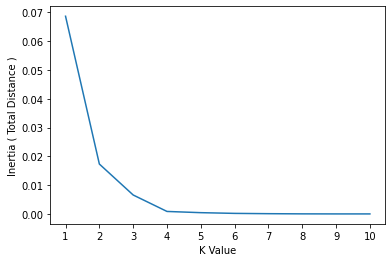

In [65]:
variances,K,n=cluster_variance(10)
plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()

In [63]:
# for K-means clustering
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

grouped_clustering = df2.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 3, 3, 3, 3, 3, 3, 0], dtype=int32)

The relationship between medical center and gym are weak. Let's try to build the population age map

## 2.4 Population data 

You’ll first want to assess the concentration of the population you’re trying to target and how close those potential patients are to the location you’re interested in. A good place to start gathering data is the U.S. Census Bureau. Census data is free, but it takes some know-how to manipulate, Cairns says. Then contact government officials in the state, city or town where you’re looking to set up shop, as well as the local chamber of commerce, for detailed demographic information.



In [67]:
df_age = pd.read_csv('./DataSet.csv', encoding='latin-1')

In [68]:
df_age.head()

,fips,County,Province,PST045214,PST045213,PST040210,PST120214,PST120213,POP010210,AGE135213,AGE295213,AGE775213,SEX255213,RHI125213,RHI225213,RHI325213,RHI425213,RHI525213,RHI625213,RHI725213,RHI825213,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,UNITED STATES,NaN,318857056,316497531,308758105,3.3,2.5,308745538,6.3,23.3,14.1,50.8,77.7,13.2,1.2,5.3,0.2,2.4,17.1,62.6,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,ALABAMA,NaN,4849377,4833996,4780127,1.4,1.1,4779736,6.1,23.0,14.9,51.5,69.8,26.6,0.7,1.3,0.1,1.5,4.1,66.4,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,55136,54571,1.5,1.0,54571,6.1,25.4,13.5,51.5,78.1,18.4,0.5,1.1,0.1,1.7,2.7,75.9,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,195443,182265,9.8,7.2,182265,5.7,22.4,18.1,51.2,87.3,9.5,0.7,0.9,0.1,1.5,4.6,83.1,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,26978,27457,-2.1,-1.7,27457,5.8,21.1,15.9,46.5,50.2,47.6,0.6,0.5,0.2,0.9,4.8,46.3,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0




*   AGE775213 Persons 65 years and over, percent, 2014
*   POP060210 Population per square mile, 2010
* INC910213 Per capita money income in past 12 months (2014 dollars), 2009-2014

Get the population distribution by age and merge into the original datase

In [69]:
age_distri = pd.read_csv('./population_distribution_by_age2014.csv')

In [70]:
age_distri.head()

,Location,Province,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65,Total,Footnotes
0,United States,NaN,0.245,0.093,0.121,0.267,0.128,0.145,1,1.0
1,Alabama,AL,0.243,0.094,0.113,0.263,0.133,0.154,1,NaN
2,Alaska,AK,0.272,0.109,0.131,0.261,0.131,0.096,1,NaN
3,Arizona,AZ,0.255,0.096,0.117,0.251,0.120,0.161,1,NaN
4,Arkansas,AR,0.256,0.089,0.115,0.258,0.127,0.156,1,NaN


In [71]:
df_popu=df_age.merge(age_distri, how='left',on='Province')

In [72]:
df_popu.head()

,fips,County,Province,PST045214,PST045213,PST040210,PST120214,PST120213,POP010210,AGE135213,AGE295213,AGE775213,SEX255213,RHI125213,RHI225213,RHI325213,RHI425213,RHI525213,RHI625213,RHI725213,RHI825213,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65,Total,Footnotes
0,0,UNITED STATES,NaN,318857056,316497531,308758105,3.3,2.5,308745538,6.3,23.3,14.1,50.8,77.7,13.2,1.2,5.3,0.2,2.4,17.1,62.6,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4,United States,0.245,0.093,0.121,0.267,0.128,0.145,1.0,1.0
1,1000,ALABAMA,NaN,4849377,4833996,4780127,1.4,1.1,4779736,6.1,23.0,14.9,51.5,69.8,26.6,0.7,1.3,0.1,1.5,4.1,66.4,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4,United States,0.245,0.093,0.121,0.267,0.128,0.145,1.0,1.0
2,1001,Autauga County,AL,55395,55136,54571,1.5,1.0,54571,6.1,25.4,13.5,51.5,78.1,18.4,0.5,1.1,0.1,1.7,2.7,75.9,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,Alabama,0.243,0.094,0.113,0.263,0.133,0.154,1.0,NaN
3,1003,Baldwin County,AL,200111,195443,182265,9.8,7.2,182265,5.7,22.4,18.1,51.2,87.3,9.5,0.7,0.9,0.1,1.5,4.6,83.1,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Alabama,0.243,0.094,0.113,0.263,0.133,0.154,1.0,NaN
4,1005,Barbour County,AL,26887,26978,27457,-2.1,-1.7,27457,5.8,21.1,15.9,46.5,50.2,47.6,0.6,0.5,0.2,0.9,4.8,46.3,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,Alabama,0.243,0.094,0.113,0.263,0.133,0.154,1.0,NaN


In [74]:
df_popu['popu_65'] = df_popu['PST045214'] * df_popu['AGE775213'] * 0.01 

df_popu['popu_dens_65'] = df_popu['popu_65'] / df_popu['LND110210']

df_popu['popu_65'] = df_popu['popu_65'].apply(lambda x: int(x))

## 2.5 Plot

In [83]:
#import laboraies

!pip install plotly-geo

     |████████████████████████████████| 23.7MB 5.0MB/s 


In [84]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.8MB/s 
     |████████████████████████████████| 6.5MB 8.0MB/s 
     |████████████████████████████████| 15.3MB 316kB/s 


In [85]:
import geopandas

In [86]:
pip install pyshp

     |████████████████████████████████| 225kB 4.3MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=2a95c42bc469e8a06f215cf614c45f0d4a20fd4e04ddef672fad54ad68f1067d
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [87]:
import shapefile

In [88]:
pip install shapely==1.6.3

     |████████████████████████████████| 225kB 4.5MB/s 
  Created wheel for shapely: filename=Shapely-1.6.3-cp37-cp37m-linux_x86_64.whl size=635632 sha256=d1840221926d865f4c12e9097d640069697b0c0872883b3b8263553792a9735d
  Stored in directory: /root/.cache/pip/wheels/12/87/ca/56f7f9f986d5041c31b61bd01fc14f16675c4123c1f073750c
Successfully built shapely
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1


In [89]:
import shapely
import plotly

In [91]:
pip install plotly-geo

In [92]:
fig = ff.create_choropleth(fips=fips, values=values)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



ValueError: ignored

In [75]:
df_age_plot = df_popu.sort_values(by=['popu_65','popu_dens_65'])
fips = df_age_plot['fips'].tolist()

In [76]:
values = df_age_plot['popu_65'].tolist()

In [77]:
endpoints = []
for i in range(0, len(values), 25):
  endpoints.append(values[i])

In [78]:
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpoints,
    # colorscale=colorscale,
    # show_state_data=False,
    # show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Aging population in the United States by County',
    legend_title='Population'
)

NameError: ignored

Output plot:

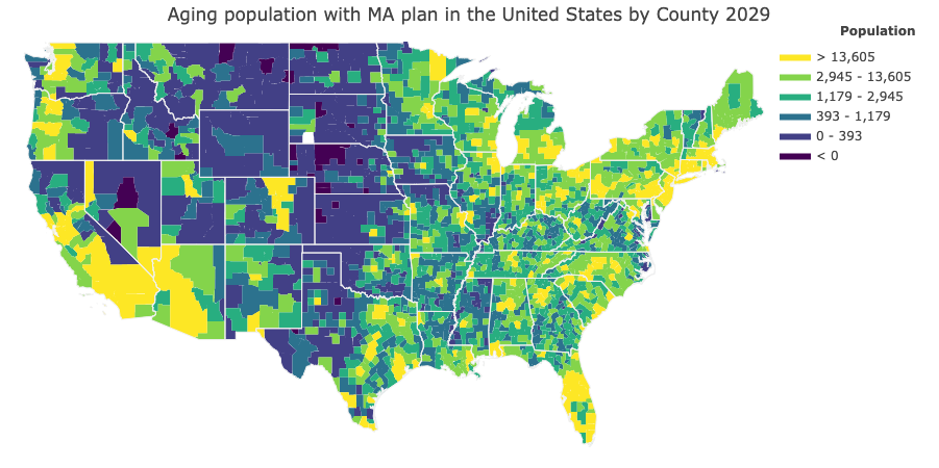

Elderly population distribution shows consistency with the locations of current healthcare company


Through the above analysis, I chose the best locations. 
One is to develop a new market, Harris County, Texas, which has a huge aging population base, and aging population is growing rapidly. Doctors’ salaries are low, and there is no corporate tax. There will be huge profits to establish a new healthcare center here. 


# 3. Thank You IBM course

The IBM Data Science Professional Certificate is an interesting course because it has many components of independent data science courses. 

Data science is one of the hottest professions of the decade, and the demand for data scientists who can analyze data and communicate results to inform data driven decisions has never been greater. This Professional Certificate from IBM will help anyone interested in pursuing a career in data science or machine learning develop career-relevant skills and experience. 

It’s a myth that to become a data scientist you need a Ph.D. Anyone with a passion for learning can take this Professional Certificate – no prior knowledge of computer science or programming languages required – and develop the skills, tools, and portfolio to have a competitive edge in the job market as an entry level data scientist.

The program consists of 9 online courses that will provide you with the latest job-ready tools and skills, including open source tools and libraries, Python, databases, SQL, data visualization, data analysis, statistical analysis, predictive modeling, and machine learning algorithms. You’ll learn data science through hands-on practice in the IBM Cloud using real data science tools and real-world data sets.

Upon successfully completing these courses, you will have built a portfolio of data science projects to provide you with the confidence to plunge into an exciting profession in data science.

In addition to earning a Professional Certificate from Coursera, you'll also receive a digital badge from IBM recognizing your proficiency in data science. 